# Covid-19 infección en Ecuador. Modelos matemáticos y predicciones
Una comparación de modelos, lineal, polilnomico,logísticos y exponenciales aplicados a la infección por el virus Covid-19

Se realiza un análisis matemático simple del crecimiento de la infección en Python y dos modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de curva.

In [11]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Actualizar los datos (URL)

url = 'http://cowid.netlify.com/data/full_data.csv'

df = pd.read_csv(url)
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


Imprimos los resultados y agregamos el numero del dia

In [13]:
df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,date,total_cases
681,60,1
682,61,1
683,62,6
684,63,7
685,64,7
686,65,13
687,66,14
688,67,14
689,68,15
690,69,15


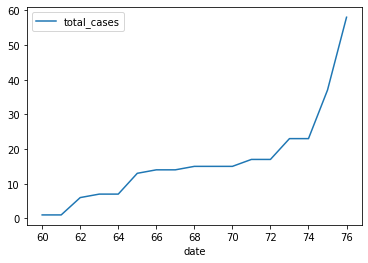

In [14]:
df.plot(x ='date', y='total_cases')

Ahora podemos analizar los cuatro modelos que tomaré en el examen, que son la función lineal, polinomica,logística y la función exponencial . Cada modelo tiene tres parámetros , que se estimarán mediante un cálculo de ajuste de curva en los datos históricos.

## EL modelo lineal

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es «dibujar una recta» que nos indicará la tendencia de un conjunto de datos continuos.

Recordemos rápidamente la fórmula de la recta:

Y = mX + b

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el «punto de corte con el eje Y» en la gráfica (cuando X=0)
Ejemplo
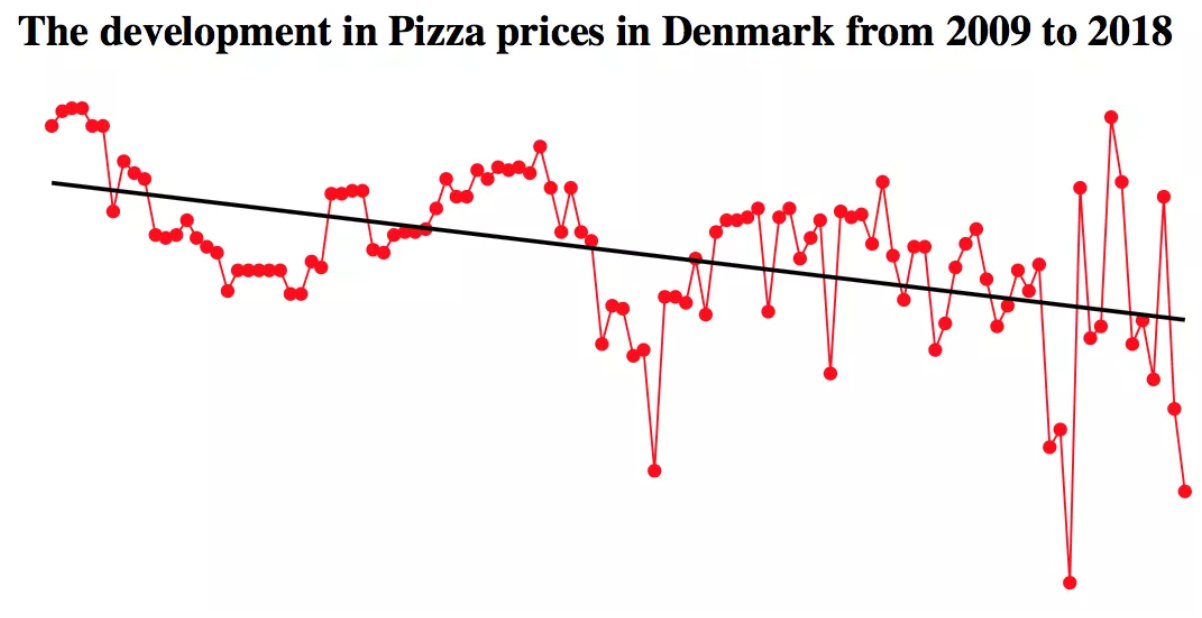

Recordemos que los algoritmos de Machine Learning Supervisados, aprenden por sí mismos y -en este caso- a obtener automáticamente esa «recta» que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor «Y» de salida real.

In [15]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [2.31617647]
Independent term: 
 -140.85294117647058


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»

In [18]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

90


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


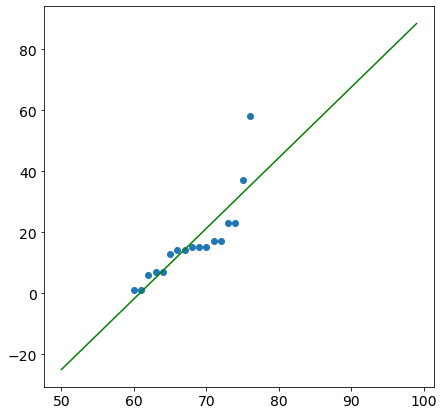

In [19]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(50, 100))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()


## El modelo logistico

El modelo logístico se ha utilizado ampliamente para describir el crecimiento de una población. Una infección puede describirse como el crecimiento de la población de un agente patógeno, por lo que un modelo logístico parece razonable .
La expresión más genérica de una función logística es:

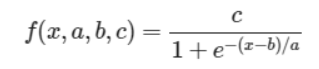

En esta fórmula, tenemos la variable x que es el tiempo y tres parámetros: a, b, c .

- a se refiere a la velocidad de infección
- b es el día en que ocurrieron las infecciones máximas
- c es el número total de personas infectadas registradas al final de la infección

A continuacion se puede apreciar un ejemplo de regresion logistica

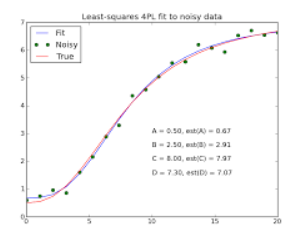

Definamos la función en Python y realicemos elprocedimiento de ajuste de curva utilizado para el crecimiento logístico.

In [16]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-637.69367899,  155.1710206 ]), array([[11872.54041468, -2814.63865054],
       [-2814.63865054,   667.4662425 ]]))


## Graficas

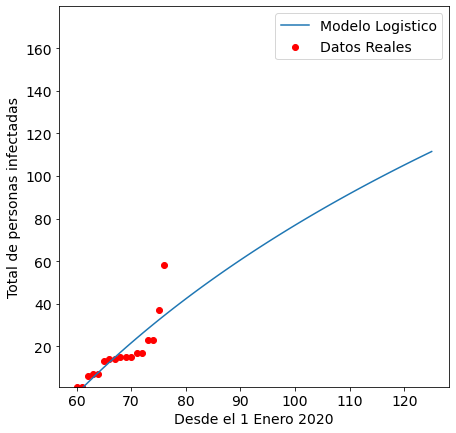

In [17]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

## Covid Ecuador - Modelo Logistico

## Formulacion del problema.

Como es de conocimiento de todos los seres humanos estamos atravesando una de las pandemias mas fuertes en los ultimos tiempos como lo es el Covid-19 que a cambiado el rumbo de las personas asi como todo lo que se ha venido planificando, hoy en dia existe muchos casos de infectados por este virus asi como tambien el numero de muertes. En nuestro pais como lo es Ecuador el primer infectado que se registro fue el 14 de Febrero del 2020. En la actualidad existen muchas herramientas para hacer calculos y predicciones de datos esto nos ayudara a simular el crecimiento de la enfermedad o pandemia en nuestro pais.

## Definicion del problema.

Con este modelo podemos obtener los contagios que se han venido generando cada dia y asi mismo las muertes, con una predicion a los dias que nosotros definamos utilizando un modelo matematico. En esta simulacion utilizaremos datos actuales de crecimiento de la pandemia en nuestro pais Ecuador-

In [62]:
# Actualizar los datos (URL)

url = 'ecuador2-covid-data.csv'
df = pd.read_csv(url)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58693,NaN,NaN,International,2020-11-19,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58694,NaN,NaN,International,2020-11-20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58695,NaN,NaN,International,2020-11-21,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58696,NaN,NaN,International,2020-11-22,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Formulacion del Modelo.

Las variables que utilizaremos son las siguientes:
    * x: El numero de dia en donde se han dado los casos de covid-19.
    * y: El numero de contagiados por dia.
    * y1: El numero de victimas mortales por dia.
    
## Coleccion de datos.

Los datos que hemos seleccionados pertenen a una base de datos global de contagiados en lo que analizaremos a Ecuador desde su primer contagio hasta la fecha.

In [63]:

df = pd.read_csv('ecuador2-covid-data.csv').fillna(0) # poniendo datos nan a cero
df= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
df=df[['date','total_cases','total_deaths']]
x=np.arange(1,len(df)+1,1) # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(df.values[:,1])
y1=np.array(df.values[:,2])
df

,date,total_cases,total_deaths
15548,2020-03-01,1.0,0.0
15549,2020-03-02,6.0,0.0
15550,2020-03-03,7.0,0.0
15552,2020-03-05,10.0,0.0
15553,2020-03-06,13.0,0.0
...,...,...,...
15811,2020-11-19,182250.0,13052.0
15812,2020-11-20,183246.0,13073.0
15813,2020-11-21,183840.0,13095.0
15814,2020-11-22,184876.0,13139.0


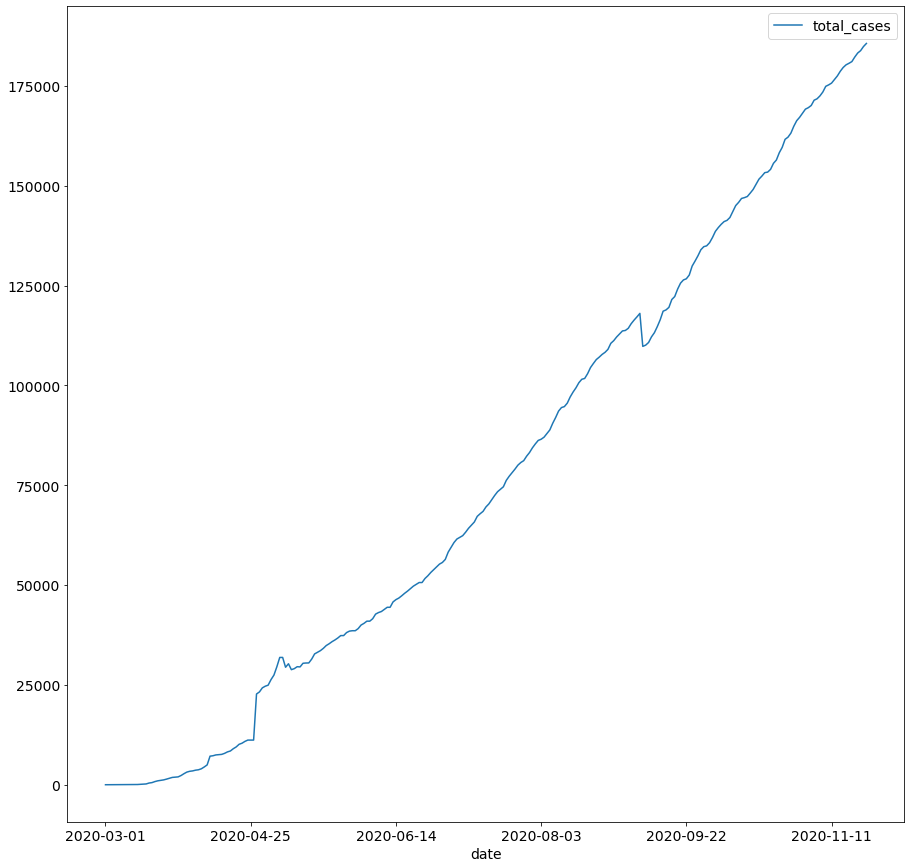

In [64]:
df.plot(x ='date', y='total_cases')

## Implementacion del Modelo en el ordenador.

El modelo que se utilizara es el modelo logaritmico

## Verificacion

Se entrena el modelo con los datos, que contienten parametros, variables que se menciono antes y con la funcion escogida.

In [65]:

from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
exp_fit1 = curve_fit(modelo_logistico,x,y1) #Extraemos los valores de los paramatros

print(exp_fit)
print("")
print(exp_fit1)

(array([-150058.85653626,   49630.68016897]), array([[ 92845920.72576353, -19393961.81113273],
       [-19393961.81113273,   4228725.55175033]]))

(array([-11646.66014159,   3808.66255316]), array([[ 630725.39748184, -131747.99781643],
       [-131747.99781643,   28726.78233777]]))


## Diseño de Experimentos.

Se realiza la simulacion para predecir cuantos casos de contagio seria aproximadamente asi mismo el numero de muertes en los proximos 50 dias.

## Experimentacion.

Despues de la simuacion se procede a realizar la grafica que nos muestra como el modelo logaritmico predice cual sera el total de contagiados y victimas mortales del covid-19

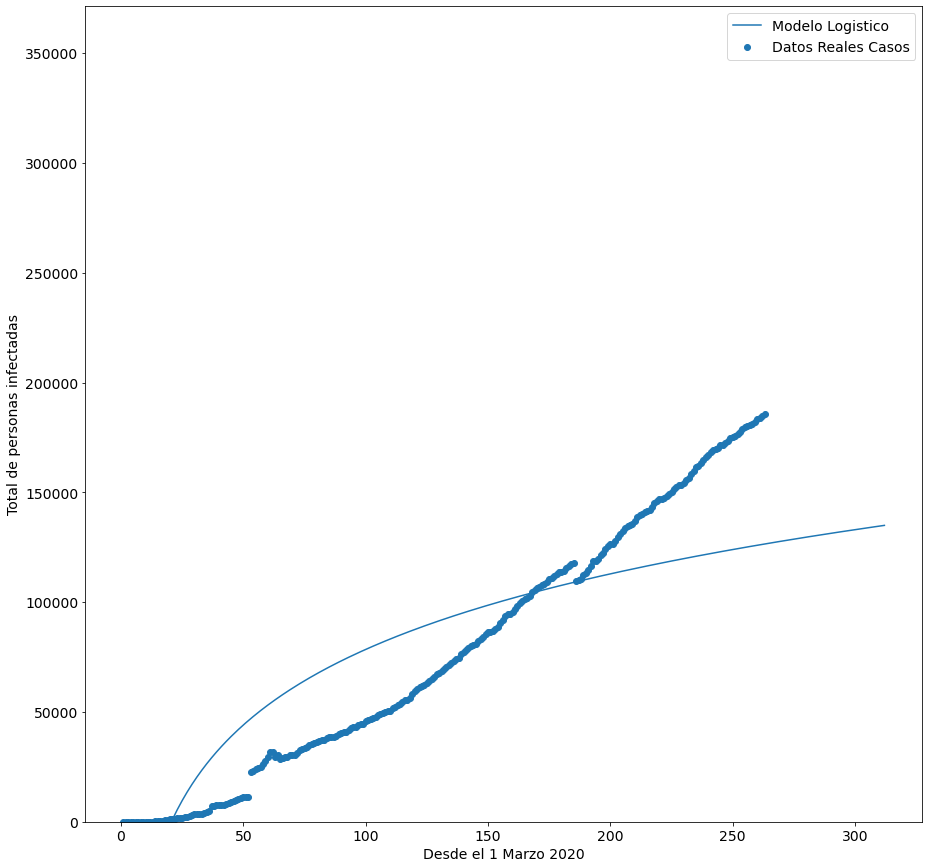

In [69]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [15, 15]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales Casos")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim(0,max(y)*2) # Definir los limites de Y
plt.show()

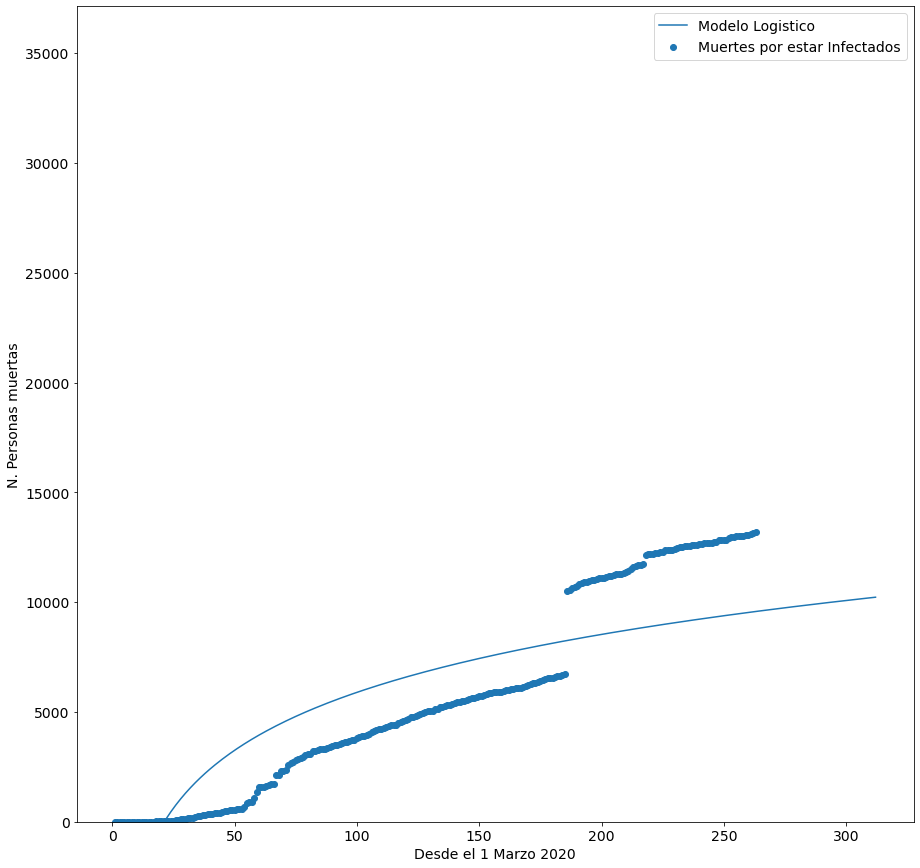

In [68]:
plt.scatter(x,y1,label="Muertes por estar Infectados")
plt.plot(pred_x, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("N. Personas muertas")
plt.ylim(0,max(y)*0.2) # Definir los limites de Y
plt.show()